# Penulisan Ilmiah - [System Recommendation] 
 
#### Perancangan Sistem Rekomendasi Jurusan Menggunakan Neural Network Berdasarkan Nilai Akademik Siswa dengan Pendekatan CRISP-DM


> Dataset : 📚 High Schools Student Grades 📚

- **Name    :** Ahmad Zaky Humami
- **NPM     :** 50422138
- **Kelas   :** 3IA27


## Project Overview

> Pemilihan jurusan perguruan tinggi merupakan keputusan krusial bagi setiap siswa SMA, namun sering kali masih didasarkan pada intuisi atau informasi yang terbatas. Dengan volume data nilai akademik yang besar dan kompleksitas kombinasi mata pelajaran, siswa dan konselor membutuhkan alat bantu yang objektif untuk menilai kecocokan jurusan. Proyek ini bertujuan mengembangkan Sistem Rekomendasi Jurusan Berbasis Neural Network menggunakan pendekatan CRISP‑DM, yang memproses data rapor siswa (core subjects dan elective IPA/IPS) untuk menghasilkan daftar jurusan Universitas Gunadarma yang paling sesuai dengan profil akademik setiap individu.

Mengapa Masalah Ini Harus Diselesaikan?
- Peningkatan Akurasi Rekomendasi Jurusan
> Dengan memanfaatkan pola non‑linier dalam nilai rapor, sistem mampu memberikan rekomendasi jurusan yang lebih tepat dibandingkan pendekatan manual atau linier sederhana.
- Pendampingan Karir Berbasis Data
> Memberikan insight personal untuk siswa dan konselor, sehingga proses penentuan jalur studi lebih terarah dan meminimalkan risiko salah pilih jurusan.
- Efisiensi Layanan Bimbingan
> Konselor dan pihak sekolah dapat memproses ribuan profil siswa secara otomatis, menghemat waktu dan sumber daya dalam sesi bimbingan akademik.
- Dasar Pengambilan Keputusan Institusional

## Business Understanding
### Problem Statements
> Sistem Rekomendasi Jurusan ini dirancang untuk membantu siswa dan konselor dalam menentukan pilihan jurusan universitas yang paling sesuai dengan profil akademik mereka. Dengan volume dan kompleksitas data nilai rapor (core subjects dan elective IPA/IPS), dibutuhkan mekanisme rekomendasi yang dapat menyajikan opsi jurusan secara otomatis dan personal.

1. Bagaimana cara menyiapkan dan mengolah data nilai rapor siswa (core & elective) secara optimal agar siap pakai untuk membangun model rekomendasi jurusan yang akurat?
2. Bagaimana merancang dan melatih model Neural Network yang mampu merekomendasikan daftar jurusan Universitas Gunadarma dengan probabilitas tinggi berdasarkan profil nilai akademik siswa?

### Goals
1. Menyusun pipeline preprocessing data (imputasi, normalisasi, encoding) yang efektif untuk menghasilkan fitur berkualitas bagi sistem rekomendasi jurusan.
2. Mengembangkan dan menguji model Neural Network berbasis CRISP‑DM yang dapat menghasilkan rekomendasi top‑K jurusan bagi setiap siswa dengan akurasi dan relevansi tinggi.

## Data Understanding

### Import Library

In [ ]:
# === Import Library ===

# Data handling & numerical computing
import pandas as pd
import numpy as np

# Visualisasi eksplorasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & modeling
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Interpretabilitas model
import shap
from lime.lime_tabular import LimeTabularExplainer
import joblib

# TensorFlow & Keras untuk Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model # type: ignore
from tensorflow.keras.layers import Dense, Dropout, Input # type: ignore
from tensorflow.keras.callbacks import EarlyStopping # type: ignore
from tensorflow.keras import utils # type: ignore
from tensorflow.keras.optimizers import Adam, RMSprop  # type: ignore

# Tuner untuk hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier
from scipy.stats import loguniform, randint

# Konfigurasi matplotlib inline (jika di notebook)
%matplotlib inline

### Load Dataset

In [2]:
## === Load Data ===
# Ganti dengan path ke file CSV Anda
df_student = 'Datasets/student_grades_5000.csv'
df_major = 'Datasets/ug_majors.csv'

df_student = pd.read_csv(df_student)
df_major = pd.read_csv(df_major)

### Deskripsi Variables

#### Dataset Student Grades

| Variabel               | Keterangan                                                         |
| ---------------------- | ------------------------------------------------------------------ |
| `student_id`           | ID unik setiap siswa, format “S00001” hingga “S05000”              |
| `track`                | Jalur peminatan siswa: “IPA” atau “IPS”                            |
| **Core Subjects**      |                                                                    |
| `agama`                | Nilai mata pelajaran Pendidikan Agama                              |
| `ppkn`                 | Nilai mata pelajaran PPKn (Pendidikan Pancasila & Kewarganegaraan) |
| `bahasa_indonesia`     | Nilai mata pelajaran Bahasa Indonesia                              |
| `matematika`           | Nilai mata pelajaran Matematika                                    |
| `bahasa_inggris`       | Nilai mata pelajaran Bahasa Inggris                                |
| `seni_budaya`          | Nilai mata pelajaran Seni & Budaya                                 |
| `penjaskes`            | Nilai mata pelajaran Pendidikan Jasmani, Olahraga, dan Kesehatan   |
| `sejarah`              | Nilai mata pelajaran Sejarah Indonesia & Dunia                     |
| **Elective IPA**       | (kolom diisi jika `track` = “IPA”, else NaN)                       |
| `fisika`               | Nilai mata pelajaran Fisika                                        |
| `kimia`                | Nilai mata pelajaran Kimia                                         |
| `biologi`              | Nilai mata pelajaran Biologi                                       |
| `matematika_peminatan` | Nilai Matematika peminatan (khusus IPA)                            |
| `informatika`          | Nilai mata pelajaran Informatika                                   |
| **Elective IPS**       | (kolom diisi jika `track` = “IPS”, else NaN)                       |
| `ekonomi`              | Nilai mata pelajaran Ekonomi                                       |
| `sosiologi`            | Nilai mata pelajaran Sosiologi                                     |
| `geografi`             | Nilai mata pelajaran Geografi                                      |
| `antropologi`          | Nilai mata pelajaran Antropologi                                   |
| `sastra_indonesia`     | Nilai mata pelajaran Sastra Indonesia                              |
| `bahasa_asing`         | Nilai mata pelajaran Bahasa Asing (Inggris/Mandarin dll.)          |


In [3]:
df_student.head(100)

student_id track  agama  ppkn  bahasa_indonesia  matematika  \
0      S00001   IPS   66.9  39.1              63.2        63.4   
1      S00002   IPA   91.0  76.9              76.7        81.1   
2      S00003   IPS   77.6  56.1              76.9        87.2   
3      S00004   IPS   60.7  36.9              83.3        76.2   
4      S00005   IPA   98.0  69.7              71.8        76.5   
..        ...   ...    ...   ...               ...         ...   
95     S00096   IPA   47.5  85.6              85.6        84.9   
96     S00097   IPS   85.2  76.8              88.4        84.0   
97     S00098   IPA   82.5  46.2              62.4        69.8   
98     S00099   IPA   81.2  92.3              66.7        77.8   
99     S00100   IPA   77.9  81.6              64.5        63.9   

    bahasa_inggris  seni_budaya  penjaskes  sejarah  ...  kimia  biologi  \
0             75.4         94.9       68.9     98.0  ...    NaN      NaN   
1             77.3         79.2       73.1     95.6  ...   58.2     87.8   
2             85.2         83.9       85.2     88.9  ...    NaN      NaN   
3             70.6         92.5       71.3     53.0  ...    NaN      NaN   
4             58.2         63.6       78.5     69.1  ...   71.6     73.7   
..             ...          ...        ...      ...  ...    ...      ...   
95            67.7         75.6       59.0     78.9  ...   81.8     88.9   
96            87.2         73.1       58.6     70.5  ...    NaN      NaN   
97            83.1         58.4       69.3     81.3  ...   73.9     93.7   
98            58.0         86.5       70.9     87.5  ...   87.1     62.5   
99            60.7         98.0       59.0     80.2  ...   68.8     67.8   

    matematika_peminatan  informatika  ekonomi  sosiologi  geografi  \
0                    NaN          NaN     59.7       80.3      50.8   
1                   68.7         83.5      NaN        NaN       NaN   
2                    NaN          NaN     64.8       90.5      34.1   
3                    NaN          NaN     73.4       61.4      67.9   
4                   63.8         88.4      NaN        NaN       NaN   
..                   ...          ...      ...        ...       ...   
95                  67.4         90.8      NaN        NaN       NaN   
96                   NaN          NaN     75.9       65.4      79.4   
97                  68.1         56.6      NaN        NaN       NaN   
98                  86.2         85.8      NaN        NaN       NaN   
99                  63.5         71.1      NaN        NaN       NaN   

    antropologi  sastra_indonesia  bahasa_asing  
0          67.4              77.6          64.4  
1           NaN               NaN           NaN  
2          98.0              63.2          54.8  
3          71.7              68.7          64.8  
4           NaN               NaN           NaN  
..          ...               ...           ...  
95          NaN               NaN           NaN  
96         54.5              61.6          70.0  
97          NaN               NaN           NaN  
98          NaN               NaN           NaN  
99          NaN               NaN           NaN  

[100 rows x 21 columns]

In [4]:
print("Info Dataset Student Grades : \n")
df_student.info()

Info Dataset Student Grades : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4902 entries, 0 to 4901
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   student_id            4902 non-null   object 
 1   track                 4902 non-null   object 
 2   agama                 4902 non-null   float64
 3   ppkn                  4902 non-null   float64
 4   bahasa_indonesia      4902 non-null   float64
 5   matematika            4902 non-null   float64
 6   bahasa_inggris        4902 non-null   float64
 7   seni_budaya           4902 non-null   float64
 8   penjaskes             4902 non-null   float64
 9   sejarah               4902 non-null   float64
 10  fisika                2775 non-null   float64
 11  kimia                 2775 non-null   float64
 12  biologi               2775 non-null   float64
 13  matematika_peminatan  2775 non-null   float64
 14  informatika           2775 non-null   fl

##### Missing Value

In [5]:
# missing value
pd.DataFrame({'Missing Value': df_student.isnull().sum()})

Missing Value
student_id                        0
track                             0
agama                             0
ppkn                              0
bahasa_indonesia                  0
matematika                        0
bahasa_inggris                    0
seni_budaya                       0
penjaskes                         0
sejarah                           0
fisika                         2127
kimia                          2127
biologi                        2127
matematika_peminatan           2127
informatika                    2127
ekonomi                        2775
sosiologi                      2775
geografi                       2775
antropologi                    2775
sastra_indonesia               2775
bahasa_asing                   2775

##### Duplicated

In [6]:
print("Jumlah Duplikasi Data Student Grades :", df_student.duplicated().sum())

Jumlah Duplikasi Data Student Grades : 0


#### Dataset Majors

| Variabel          | Keterangan                                                                          |
| ----------------- | ----------------------------------------------------------------------------------- |
| code              | Kode unik jurusan di Universitas Gunadarma (misalnya A1, A2, ..., A13)              |
| major             | Nama jurusan (misalnya: Teknik Informatika, Akuntansi, Psikologi, dsb)              |
| faculty           | Fakultas tempat jurusan berada (misalnya: Fakultas Teknik, Ekonomi, dll)            |
| track\_type       | Jenis peminatan siswa yang cocok (IPA / IPS)                                        |
| related\_subjects | Daftar mata pelajaran yang relevan untuk jurusan ini (misalnya: Matematika, Fisika) |


In [7]:
df_major.head(13)

code               major                                         faculty  \
0    A1           Manajemen                                Fakultas Ekonomi   
1    A2           Akuntansi                                Fakultas Ekonomi   
2    A3     Teknik Industri                     Fakultas Teknologi Industri   
3    A4  Teknik Informatika                     Fakultas Teknologi Industri   
4    A5        Teknik Mesin                     Fakultas Teknologi Industri   
5    A6      Teknik Elektro                     Fakultas Teknologi Industri   
6    A7    Sistem Informasi  Fakultas Ilmu Komputer dan Teknologi Informasi   
7    A8       Ilmu Komputer  Fakultas Ilmu Komputer dan Teknologi Informasi   
8    A9      Sastra Inggris                                 Fakultas Sastra   
9   A10           Psikologi                              Fakultas Psikologi   
10  A11          Arsitektur           Fakultas Teknik Sipil dan Perencanaan   
11  A12        Teknik Sipil           Fakultas Teknik Sipil dan Perencanaan   
12  A13     Desain Interior           Fakultas Teknik Sipil dan Perencanaan   

   track_type                                   related_subjects  
0         IPS           ekonomi;matematika;bahasa_indonesia;ppkn  
1         IPS             ekonomi;matematika;bahasa_inggris;ppkn  
2         IPA  fisika;kimia;matematika_peminatan;informatika;...  
3         IPA    matematika_peminatan;informatika;bahasa_inggris  
4         IPA       fisika;kimia;matematika_peminatan;matematika  
5         IPA                      fisika;matematika;informatika  
6         IPA            fisika;matematika_peminatan;informatika  
7         IPA    matematika_peminatan;informatika;bahasa_inggris  
8         IPS   bahasa_inggris;bahasa_indonesia;sastra_indonesia  
9         IPS                 biologi;sosiologi;bahasa_indonesia  
10        IPA                      matematika;fisika;seni_budaya  
11        IPA                         fisika;matematika;geografi  
12        IPS              seni_budaya;bahasa_indonesia;geografi

In [8]:
print("Info Dataset Majors : \n")
df_major.info()

Info Dataset Majors : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   code              13 non-null     object
 1   major             13 non-null     object
 2   faculty           13 non-null     object
 3   track_type        13 non-null     object
 4   related_subjects  13 non-null     object
dtypes: object(5)
memory usage: 648.0+ bytes


##### Missing Values

In [9]:
pd.DataFrame({'Missing Value': df_major.isnull().sum()})

Missing Value
code                          0
major                         0
faculty                       0
track_type                    0
related_subjects              0

##### Duplicated

In [10]:
print("Jumlah Duplikasi Data Majors :", df_major.duplicated().sum())

Jumlah Duplikasi Data Majors : 0


### Exploratory Data Analysis

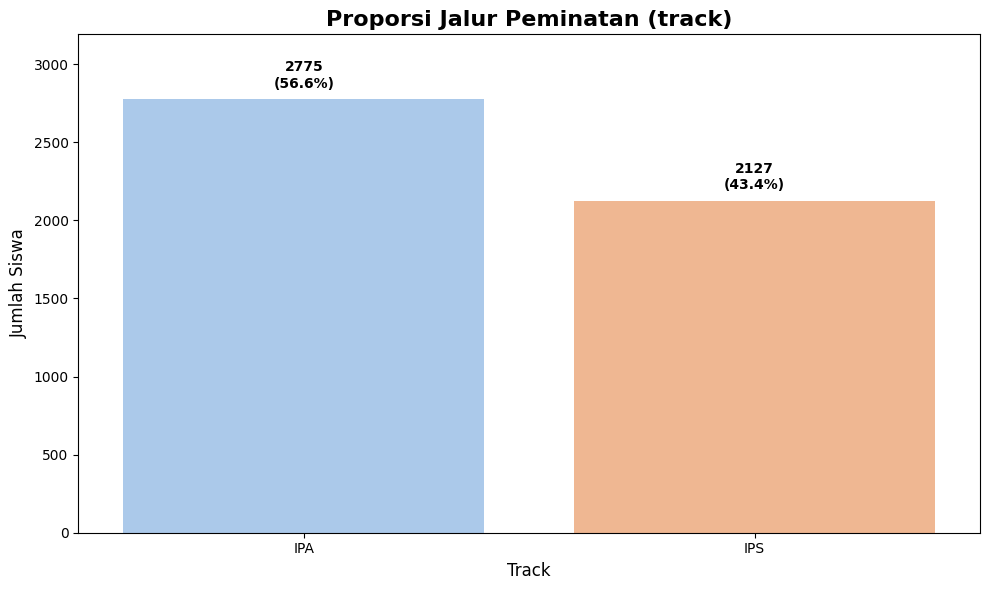

In [11]:
# 1. Bar chart untuk 'track'
track_counts = df_student['track'].value_counts().sort_index()
total = track_counts.sum()
track_percentages = track_counts / total * 100
plt.figure(figsize=(10, 6))
# Use seaborn barplot with hue to avoid palette warning, legend false
sns.barplot(x=track_counts.index, y=track_counts.values, hue=track_counts.index, 
            palette='pastel', legend=False)
plt.title('Proporsi Jalur Peminatan (track)', fontsize=16, fontweight='bold')
plt.xlabel('Track', fontsize=12)
plt.ylabel('Jumlah Siswa', fontsize=12)
# Add margin on top
max_count = track_counts.values.max()
plt.ylim(0, max_count * 1.15)
# Add annotations for counts and percentages
for i, (count, pct) in enumerate(zip(track_counts.values, track_percentages.values)):
      plt.text(i, count + max_count*0.02,  # position just above the bar with margin
                  f"{count}\n({pct:.1f}%)",
                  ha='center',
                  va='bottom',
                  fontsize=10,
                  fontweight='semibold')
plt.tight_layout()
plt.show()

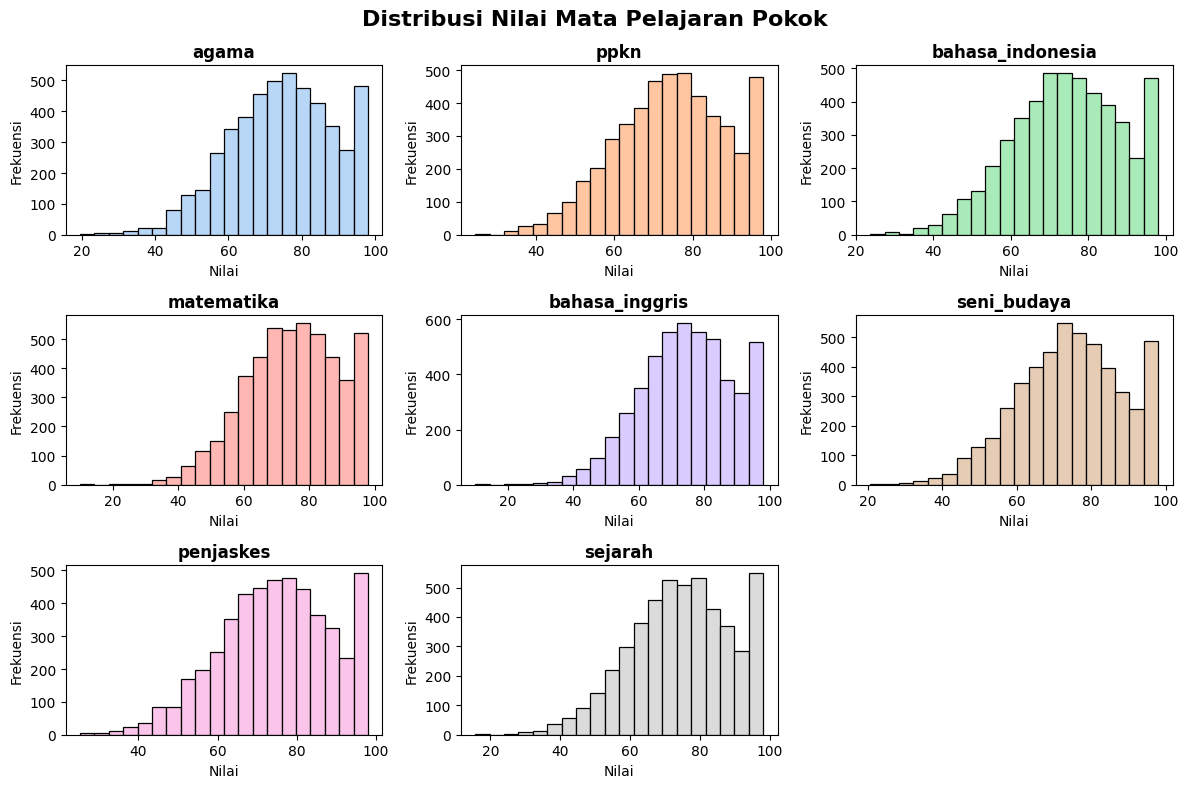

In [12]:
# 2. Histograms untuk setiap mata pelajaran pokok
core_subjects = [
      'agama', 'ppkn', 'bahasa_indonesia', 'matematika', 'bahasa_inggris',
      'seni_budaya', 'penjaskes', 'sejarah'
]
palette = sns.color_palette('pastel', n_colors=len(core_subjects))
fig, axes = plt.subplots(3, 3, figsize=(12, 8))
axes = axes.flatten()

# Plot title for the entire figure
fig.suptitle('Distribusi Nilai Mata Pelajaran Pokok', fontsize=16, fontweight='bold')
for i, (col, color) in enumerate(zip(core_subjects, palette)):
      sns.histplot(df_student[col], bins=20, color=color, ax=axes[i], kde=False)
      axes[i].set_title(col, fontsize=12, fontweight='bold')
      axes[i].set_xlabel('Nilai', fontsize=10)
      axes[i].set_ylabel('Frekuensi', fontsize=10)
# If more subplots than subjects, hide empty subplots
for j in range(len(core_subjects), len(axes)):
      fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

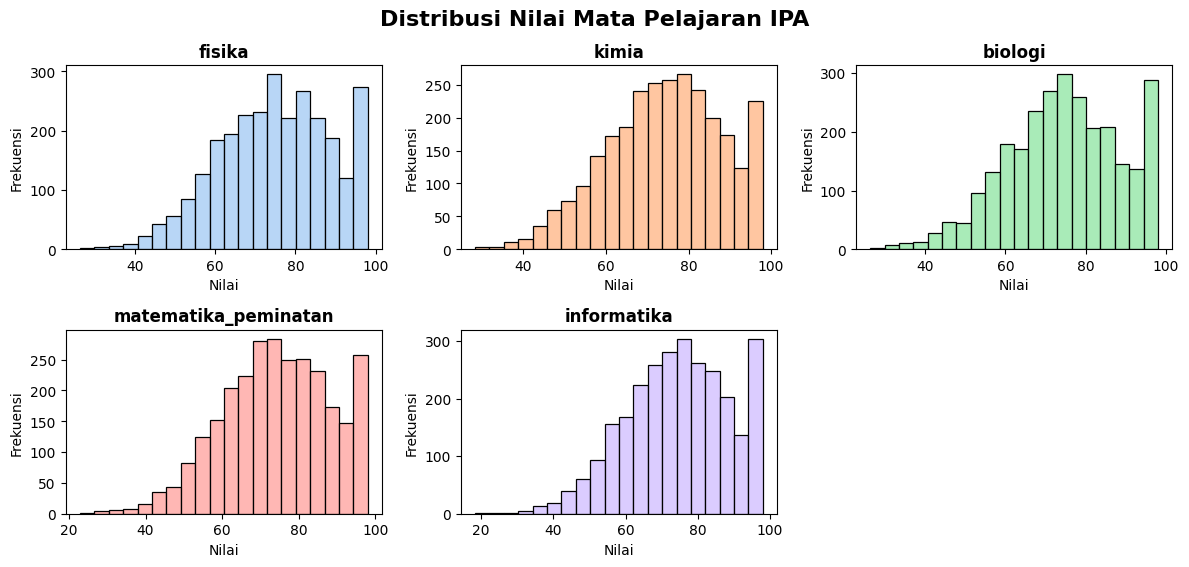

In [13]:
# Histograms untuk setiap mata pelajaran elektif IPA
ipa_subjects = [
      'fisika', 'kimia', 'biologi', 'matematika_peminatan', 'informatika',
]
palette = sns.color_palette('pastel', n_colors=len(ipa_subjects))
fig, axes = plt.subplots(3, 3, figsize=(12, 8))
axes = axes.flatten()

# Plot title for the entire figure
fig.suptitle('Distribusi Nilai Mata Pelajaran IPA', fontsize=16, fontweight='bold')
for i, (col, color) in enumerate(zip(ipa_subjects, palette)):
      sns.histplot(df_student[col], bins=20, color=color, ax=axes[i], kde=False)
      axes[i].set_title(col, fontsize=12, fontweight='bold')
      axes[i].set_xlabel('Nilai', fontsize=10)
      axes[i].set_ylabel('Frekuensi', fontsize=10)
# If more subplots than subjects, hide empty subplots
for j in range(len(ipa_subjects), len(axes)):
      fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

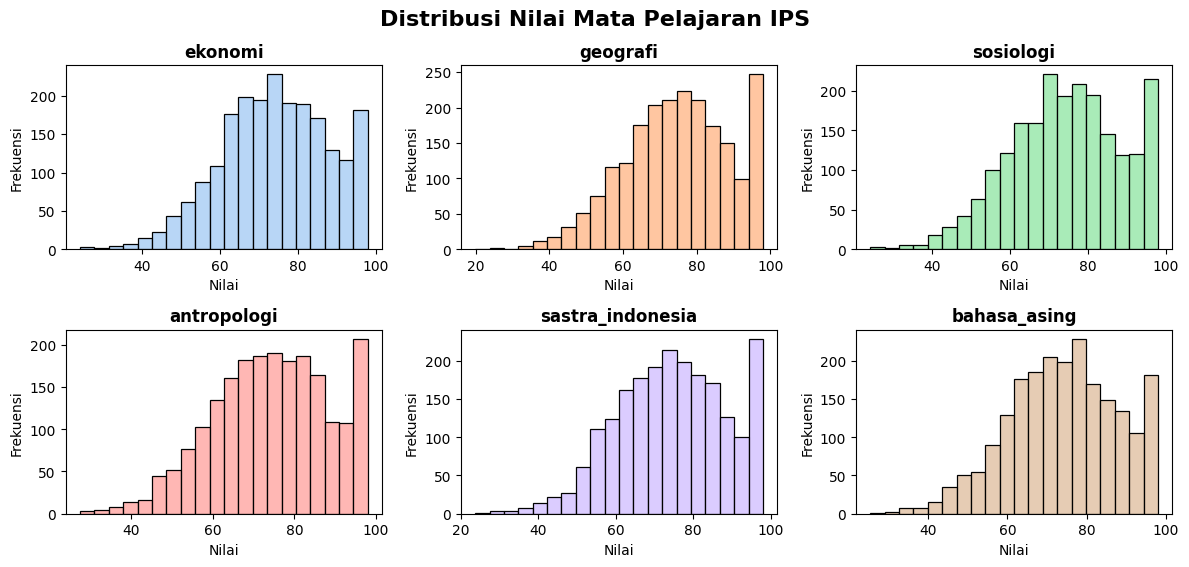

In [14]:
# Histograms untuk setiap mata pelajaran elektif IPS
ips_subjects = [
      'ekonomi', 'geografi', 'sosiologi', 'antropologi', 'sastra_indonesia', 'bahasa_asing',
]

palette = sns.color_palette('pastel', n_colors=len(ips_subjects))
fig, axes = plt.subplots(3, 3, figsize=(12, 8))
axes = axes.flatten()

# Plot title for the entire figure
fig.suptitle('Distribusi Nilai Mata Pelajaran IPS', fontsize=16, fontweight='bold')
for i, (col, color) in enumerate(zip(ips_subjects, palette)):
      sns.histplot(df_student[col], bins=20, color=color, ax=axes[i], kde=False)
      axes[i].set_title(col, fontsize=12, fontweight='bold')
      axes[i].set_xlabel('Nilai', fontsize=10)
      axes[i].set_ylabel('Frekuensi', fontsize=10)
# If more subplots than subjects, hide empty subplots
for j in range(len(ips_subjects), len(axes)):
      fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

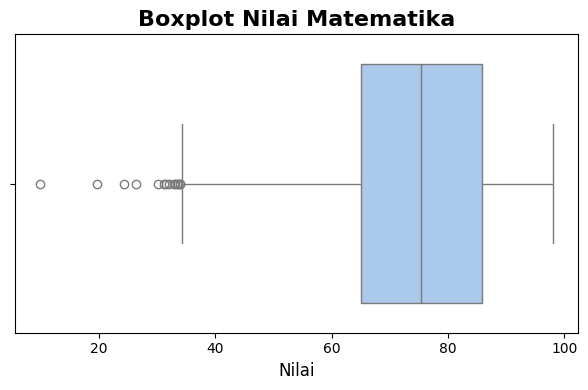

In [15]:
# 3. Boxplot distribusi nilai matematika
plt.figure(figsize=(6, 4))
# Choose one pastel color, e.g. the first from pastel palette
color = sns.color_palette('pastel')[0]
# seaborn boxplot with horizontal orientation
sns.boxplot(x=df_student['matematika'].dropna(), orient='h', color=color)
plt.title('Boxplot Nilai Matematika', fontsize=16, fontweight='bold')
plt.xlabel('Nilai', fontsize=12)
plt.tight_layout()
plt.show()

## Data Preparation

### Feature Enginering 

#### Recommended Major

In [16]:
def compute_major_score(row, major_subjects):
      vals = [row[subj] for subj in major_subjects if pd.notna(row.get(subj))]
      return np.mean(vals) if vals else np.nan

recommended_codes = []
for _, student in df_student.iterrows():
      track = student['track'].lower()
      best_score = -np.inf
      best_code  = None

      for _, mj in df_major.iterrows():
            # Ambil track_type bisa 'IPA', 'IPS', atau 'IPA/IPS'
            mj_track = mj['track_type'].lower()
            if (mj_track == track) or (mj_track == 'ipa/ips'):
                  # pecah related_subjects dengan ';'
                  subjects = [s.strip() for s in mj['related_subjects'].split(';')]
                  score = compute_major_score(student, subjects)
                  if score > best_score:
                        best_score = score
                        best_code  = mj['code']   # gunakan kode, bukan nama

      recommended_codes.append(best_code)

df_student['recommended_major'] = recommended_codes

In [17]:
df_student['recommended_major'].value_counts().sort_index()

recommended_major
A1     225
A10    565
A11    507
A12    540
A13    470
A2     479
A3      52
A4     719
A5     290
A6     281
A7     386
A9     388
Name: count, dtype: int64

In [18]:
df_student.head(100)

student_id track  agama  ppkn  bahasa_indonesia  matematika  \
0      S00001   IPS   66.9  39.1              63.2        63.4   
1      S00002   IPA   91.0  76.9              76.7        81.1   
2      S00003   IPS   77.6  56.1              76.9        87.2   
3      S00004   IPS   60.7  36.9              83.3        76.2   
4      S00005   IPA   98.0  69.7              71.8        76.5   
..        ...   ...    ...   ...               ...         ...   
95     S00096   IPA   47.5  85.6              85.6        84.9   
96     S00097   IPS   85.2  76.8              88.4        84.0   
97     S00098   IPA   82.5  46.2              62.4        69.8   
98     S00099   IPA   81.2  92.3              66.7        77.8   
99     S00100   IPA   77.9  81.6              64.5        63.9   

    bahasa_inggris  seni_budaya  penjaskes  sejarah  ...  biologi  \
0             75.4         94.9       68.9     98.0  ...      NaN   
1             77.3         79.2       73.1     95.6  ...     87.8   
2             85.2         83.9       85.2     88.9  ...      NaN   
3             70.6         92.5       71.3     53.0  ...      NaN   
4             58.2         63.6       78.5     69.1  ...     73.7   
..             ...          ...        ...      ...  ...      ...   
95            67.7         75.6       59.0     78.9  ...     88.9   
96            87.2         73.1       58.6     70.5  ...      NaN   
97            83.1         58.4       69.3     81.3  ...     93.7   
98            58.0         86.5       70.9     87.5  ...     62.5   
99            60.7         98.0       59.0     80.2  ...     67.8   

    matematika_peminatan  informatika  ekonomi  sosiologi  geografi  \
0                    NaN          NaN     59.7       80.3      50.8   
1                   68.7         83.5      NaN        NaN       NaN   
2                    NaN          NaN     64.8       90.5      34.1   
3                    NaN          NaN     73.4       61.4      67.9   
4                   63.8         88.4      NaN        NaN       NaN   
..                   ...          ...      ...        ...       ...   
95                  67.4         90.8      NaN        NaN       NaN   
96                   NaN          NaN     75.9       65.4      79.4   
97                  68.1         56.6      NaN        NaN       NaN   
98                  86.2         85.8      NaN        NaN       NaN   
99                  63.5         71.1      NaN        NaN       NaN   

    antropologi  sastra_indonesia  bahasa_asing  recommended_major  
0          67.4              77.6          64.4                 A9  
1           NaN               NaN           NaN                 A6  
2          98.0              63.2          54.8                A10  
3          71.7              68.7          64.8                A13  
4           NaN               NaN           NaN                 A6  
..          ...               ...           ...                ...  
95          NaN               NaN           NaN                 A6  
96         54.5              61.6          70.0                 A1  
97          NaN               NaN           NaN                A12  
98          NaN               NaN           NaN                 A3  
99          NaN               NaN           NaN                A11  

[100 rows x 22 columns]

#### Threshold Passing Grade

In [19]:
def add_passing_grade(df_students: pd.DataFrame,
                        df_majors: pd.DataFrame,
                        pct: float = 75.0,
                        related_col: str = 'related_subjects') -> pd.Series:
      """
      Hitung persentil rata-rata nilai siswa untuk setiap major,
      lalu kembalikan Series passing_grade.
      """
      thresholds = []
      for _, mj in df_majors.iterrows():
            # Parse dan format nama mapel terkait
            rel = [s.strip().lower().replace(' ', '_')
                  for s in mj[related_col].split(';')]
            # Ambil kolom yang cocok
            cols = [c for c in df_students.columns if c in rel]
            if not cols:
                  thresholds.append(np.nan)
                  continue
            # Rata‑rata per siswa
            avg_scores = df_students[cols].mean(axis=1)
            # Persentil ke-pct
            value = np.percentile(avg_scores.dropna(), pct)
            thresholds.append(round(value, 2))
      return pd.Series(thresholds, name='passing_grade')

df_major['passing_grade'] = add_passing_grade(df_student, df_major, pct=75)

In [20]:
# tampilkan nama major dan passing grade
df_major[['major', 'passing_grade']].sort_values(by='passing_grade', ascending=False)

major  passing_grade
5       Teknik Elektro          82.20
11        Teknik Sipil          82.05
9            Psikologi          81.75
7        Ilmu Komputer          81.50
3   Teknik Informatika          81.50
4         Teknik Mesin          81.36
12     Desain Interior          81.20
10          Arsitektur          81.00
8       Sastra Inggris          81.00
2      Teknik Industri          80.85
6     Sistem Informasi          80.33
1            Akuntansi          80.19
0            Manajemen          80.05

In [21]:
df_major.head(15)

code               major                                         faculty  \
0    A1           Manajemen                                Fakultas Ekonomi   
1    A2           Akuntansi                                Fakultas Ekonomi   
2    A3     Teknik Industri                     Fakultas Teknologi Industri   
3    A4  Teknik Informatika                     Fakultas Teknologi Industri   
4    A5        Teknik Mesin                     Fakultas Teknologi Industri   
5    A6      Teknik Elektro                     Fakultas Teknologi Industri   
6    A7    Sistem Informasi  Fakultas Ilmu Komputer dan Teknologi Informasi   
7    A8       Ilmu Komputer  Fakultas Ilmu Komputer dan Teknologi Informasi   
8    A9      Sastra Inggris                                 Fakultas Sastra   
9   A10           Psikologi                              Fakultas Psikologi   
10  A11          Arsitektur           Fakultas Teknik Sipil dan Perencanaan   
11  A12        Teknik Sipil           Fakultas Teknik Sipil dan Perencanaan   
12  A13     Desain Interior           Fakultas Teknik Sipil dan Perencanaan   

   track_type                                   related_subjects  \
0         IPS           ekonomi;matematika;bahasa_indonesia;ppkn   
1         IPS             ekonomi;matematika;bahasa_inggris;ppkn   
2         IPA  fisika;kimia;matematika_peminatan;informatika;...   
3         IPA    matematika_peminatan;informatika;bahasa_inggris   
4         IPA       fisika;kimia;matematika_peminatan;matematika   
5         IPA                      fisika;matematika;informatika   
6         IPA            fisika;matematika_peminatan;informatika   
7         IPA    matematika_peminatan;informatika;bahasa_inggris   
8         IPS   bahasa_inggris;bahasa_indonesia;sastra_indonesia   
9         IPS                 biologi;sosiologi;bahasa_indonesia   
10        IPA                      matematika;fisika;seni_budaya   
11        IPA                         fisika;matematika;geografi   
12        IPS              seni_budaya;bahasa_indonesia;geografi   

    passing_grade  
0           80.05  
1           80.19  
2           80.85  
3           81.50  
4           81.36  
5           82.20  
6           80.33  
7           81.50  
8           81.00  
9           81.75  
10          81.00  
11          82.05  
12          81.20

In [22]:
# export ke CSV
df_major.to_csv('Datasets/ug_majors_with_passing_grade.csv', index=False)

### Mapping Track

In [23]:
# Tambah binary track
df_student['track_bin'] = df_student['track'].map({'IPA': 1, 'IPS': 0}).astype(int)

# Finalisasi: drop kolom non-numerik yang tidak digunakan saat modeling
final_df = df_student.drop(columns=['student_id','track'])

# Cek hasil
final_df.head(500)

agama  ppkn  bahasa_indonesia  matematika  bahasa_inggris  seni_budaya  \
0     66.9  39.1              63.2        63.4            75.4         94.9   
1     91.0  76.9              76.7        81.1            77.3         79.2   
2     77.6  56.1              76.9        87.2            85.2         83.9   
3     60.7  36.9              83.3        76.2            70.6         92.5   
4     98.0  69.7              71.8        76.5            58.2         63.6   
..     ...   ...               ...         ...             ...          ...   
495   61.6  69.3              70.2        89.6            77.8         89.2   
496   98.0  66.8              53.0        41.2            59.8         52.2   
497   53.0  62.5              79.3        53.6            52.6         89.3   
498   56.8  74.1              78.3        78.5            98.0         69.0   
499   88.0  73.9              53.6        80.0            25.2         56.1   

     penjaskes  sejarah  fisika  kimia  ...  matematika_peminatan  \
0         68.9     98.0     NaN    NaN  ...                   NaN   
1         73.1     95.6    71.4   58.2  ...                  68.7   
2         85.2     88.9     NaN    NaN  ...                   NaN   
3         71.3     53.0     NaN    NaN  ...                   NaN   
4         78.5     69.1    64.1   71.6  ...                  63.8   
..         ...      ...     ...    ...  ...                   ...   
495       92.1     89.3    77.9   64.1  ...                  86.3   
496       98.0     68.5    71.7   59.7  ...                  77.9   
497       70.7     74.8    98.0   81.6  ...                  75.2   
498       85.1     83.4    95.1   84.6  ...                  74.3   
499       84.4     91.1    97.3   61.9  ...                  81.9   

     informatika  ekonomi  sosiologi  geografi  antropologi  sastra_indonesia  \
0            NaN     59.7       80.3      50.8         67.4              77.6   
1           83.5      NaN        NaN       NaN          NaN               NaN   
2            NaN     64.8       90.5      34.1         98.0              63.2   
3            NaN     73.4       61.4      67.9         71.7              68.7   
4           88.4      NaN        NaN       NaN          NaN               NaN   
..           ...      ...        ...       ...          ...               ...   
495         80.7      NaN        NaN       NaN          NaN               NaN   
496         90.9      NaN        NaN       NaN          NaN               NaN   
497         57.3      NaN        NaN       NaN          NaN               NaN   
498         65.9      NaN        NaN       NaN          NaN               NaN   
499         90.1      NaN        NaN       NaN          NaN               NaN   

     bahasa_asing  recommended_major track_bin  
0            64.4                 A9         0  
1             NaN                 A6         1  
2            54.8                A10         0  
3            64.8                A13         0  
4             NaN                 A6         1  
..            ...                ...       ...  
495           NaN                A11         1  
496           NaN                 A7         1  
497           NaN                A11         1  
498           NaN                A12         1  
499           NaN                 A7         1  

[500 rows x 21 columns]

In [24]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4902 entries, 0 to 4901
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   agama                 4902 non-null   float64
 1   ppkn                  4902 non-null   float64
 2   bahasa_indonesia      4902 non-null   float64
 3   matematika            4902 non-null   float64
 4   bahasa_inggris        4902 non-null   float64
 5   seni_budaya           4902 non-null   float64
 6   penjaskes             4902 non-null   float64
 7   sejarah               4902 non-null   float64
 8   fisika                2775 non-null   float64
 9   kimia                 2775 non-null   float64
 10  biologi               2775 non-null   float64
 11  matematika_peminatan  2775 non-null   float64
 12  informatika           2775 non-null   float64
 13  ekonomi               2127 non-null   float64
 14  sosiologi             2127 non-null   float64
 15  geografi             

### Label Encoder

In [25]:
le = LabelEncoder().fit(final_df['recommended_major'])
classes = list(le.classes_)

### Numerical Feature

In [26]:
feature_cols = core_subjects + ipa_subjects + ips_subjects

X = final_df[feature_cols]
y_idx = le.transform(final_df['recommended_major'])

### Split Data

In [27]:
# 4. Split data: 70% train, 30% temp (val+test)
X_train, X_temp, y_train, y_temp = train_test_split(
      X, y_idx, train_size=0.70, stratify=y_idx, random_state=42
)

# Split temp: 50% val, 50% test → masing‑masing 15% total
X_val, X_test, y_val, y_test = train_test_split(
      X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

# Cek ukuran masing‑masing
print(f"Train: {len(X_train)} samples")
print(f"Validation: {len(X_val)} samples")
print(f"Test: {len(X_test)} samples")

Train: 3431 samples
Validation: 735 samples
Test: 736 samples


### Simple Imputer and Standard Scaler

In [28]:
num_pipe = Pipeline([
      ('imputer', SimpleImputer(strategy='mean')),
      ('scaler',  StandardScaler())
])

# --- Preprocess X untuk Keras ---
X_train_scaled = num_pipe.fit_transform(X_train)
X_test_scaled  = num_pipe.transform(X_test)
X_val_scaled = num_pipe.transform(X_val)

## Modeling

### Neural Network Keras Sequential

In [29]:
model = Sequential([
      Input(shape=(X_train_scaled.shape[1],)),
      Dense(64, activation='relu'),
      Dropout(0.2),
      Dense(32, activation='relu'),
      Dropout(0.2),
      Dense(len(classes), activation='softmax'),
])

In [30]:
model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 12)             │           396 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,756 (14.67 KB)

 Trainable params: 3,756 (14.67 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# --- Training dengan EarlyStopping ---
callbacks = EarlyStopping(
      monitor='val_loss',
      patience=10,
      restore_best_weights=True
)

history = model.fit(
      X_train_scaled, y_train,
      validation_split=0.15,
      validation_data=(X_val_scaled, y_val),
      epochs=100,
      batch_size=32,
      callbacks=[callbacks],
      verbose=2
)

Epoch 1/100
108/108 - 1s - 9ms/step - accuracy: 0.2294 - loss: 2.2876 - val_accuracy: 0.4680 - val_loss: 1.9477
Epoch 2/100
108/108 - 0s - 2ms/step - accuracy: 0.4264 - loss: 1.8218 - val_accuracy: 0.6190 - val_loss: 1.4304
Epoch 3/100
108/108 - 0s - 1ms/step - accuracy: 0.5410 - loss: 1.4399 - val_accuracy: 0.6993 - val_loss: 1.0893
Epoch 4/100
108/108 - 0s - 1ms/step - accuracy: 0.5864 - loss: 1.2271 - val_accuracy: 0.7537 - val_loss: 0.9005
Epoch 5/100
108/108 - 0s - 1ms/step - accuracy: 0.6205 - loss: 1.0968 - val_accuracy: 0.7782 - val_loss: 0.7821
Epoch 6/100
108/108 - 0s - 1ms/step - accuracy: 0.6625 - loss: 0.9700 - val_accuracy: 0.8027 - val_loss: 0.6902
Epoch 7/100
108/108 - 0s - 1ms/step - accuracy: 0.6858 - loss: 0.9157 - val_accuracy: 0.8122 - val_loss: 0.6277
Epoch 8/100
108/108 - 0s - 1ms/step - accuracy: 0.7077 - loss: 0.8410 - val_accuracy: 0.8245 - val_loss: 0.5731
Epoch 9/100
108/108 - 0s - 1ms/step - accuracy: 0.7246 - loss: 0.7744 - val_accuracy: 0.8517 - val_loss:

In [32]:
# --- Evaluasi ---
loss, acc = model.evaluate(X_test_scaled, y_test, verbose=0)

y_pred_proba = model.predict(X_test_scaled)
y_pred_idx   = y_pred_proba.argmax(axis=1)
print(f"Test accuracy (Keras Sequential): {acc:.4f}")
print("Keras Sequential Classification Report:\n", classification_report(
      [classes[i] for i in y_test],
      [classes[i] for i in y_pred_idx]
))

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Test accuracy (Keras Sequential): 0.9226
Keras Sequential Classification Report:
               precision    recall  f1-score   support

          A1       0.84      0.94      0.89        33
         A10       0.95      0.98      0.97        85
         A11       0.89      0.95      0.92        76
         A12       0.91      0.89      0.90        81
         A13       0.93      0.92      0.92        71
          A2       0.96      0.90      0.93        72
          A3       0.83      0.62      0.71         8
          A4       0.95      0.98      0.96       108
          A5       0.80      0.84      0.82        44
          A6       0.97      0.86      0.91        42
          A7       0.95      0.91      0.93        58
          A9       0.95      0.93      0.94        58

    accuracy                           0.92       736
   macro avg       0.91      0.89      0.90       736
weighted avg       0.92      0.92      0.92       736



In [33]:
print("Train accuracy (Keras Sequential):", model.evaluate(X_train_scaled, y_train))
print(f"Test accuracy (Keras Sequential): {acc:.4f}")

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.9799 - loss: 0.1155
Train accuracy (Keras Sequential): [0.10958164185285568, 0.979597806930542]
Test accuracy (Keras Sequential): 0.9226


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step


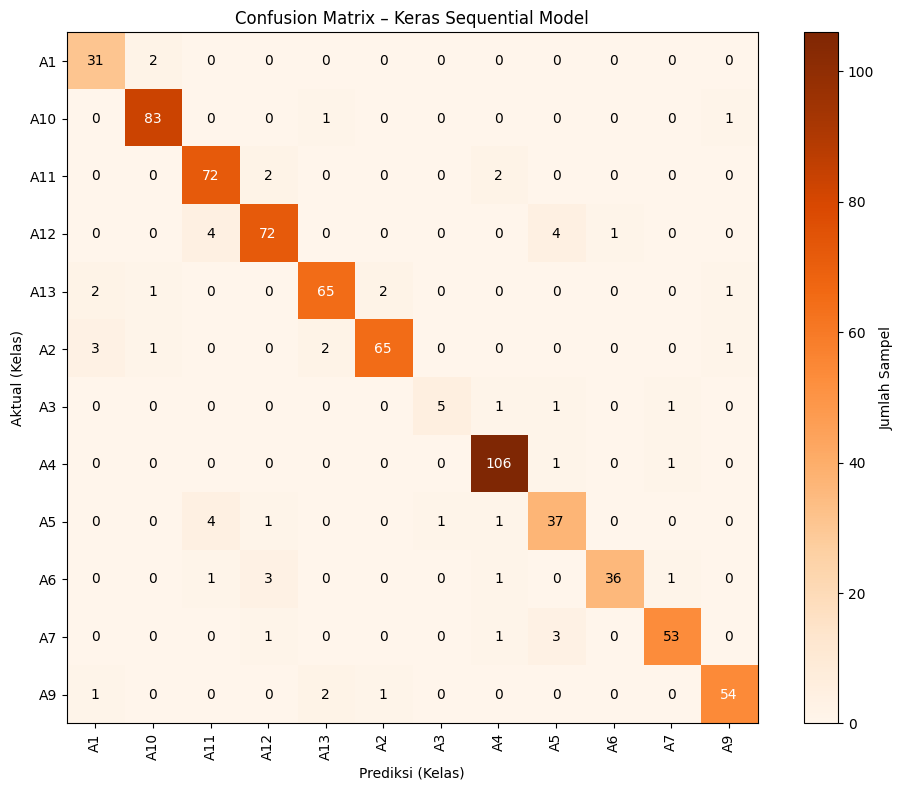

In [34]:
# 1. Dapatkan prediksi kelas label dari model Keras
y_proba = model.predict(X_test_scaled)        # probabilitas per kelas
y_pred_idx = np.argmax(y_proba, axis=1)       # indeks kelas terpilih
y_true_idx = y_test                           # indeks label sebenarnya

# 2. Mapping kembali indeks → kode jurusan
y_pred_codes = [classes[i] for i in y_pred_idx]
y_true_codes = [classes[i] for i in y_true_idx]

# 3. Hitung confusion matrix dengan urutan lengkap semua kelas
cm_keras = confusion_matrix(
      y_true_codes,
      y_pred_codes,
      labels=classes
)

# 4. Visualisasi dengan matplotlib
fig, ax = plt.subplots(figsize=(10,8))
im = ax.imshow(cm_keras, cmap='Oranges')

# Colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Jumlah Sampel')

# Ticks & labels
ax.set_xticks(range(len(classes)))
ax.set_yticks(range(len(classes)))
ax.set_xticklabels(classes, rotation=90)
ax.set_yticklabels(classes)

# Labels dan title
ax.set_xlabel('Prediksi (Kelas)')
ax.set_ylabel('Aktual (Kelas)')
ax.set_title('Confusion Matrix – Keras Sequential Model')

# Annotasi tiap sel
thresh = cm_keras.max() / 2
for i in range(cm_keras.shape[0]):
      for j in range(cm_keras.shape[1]):
            color = 'white' if cm_keras[i, j] > thresh else 'black'
            ax.text(j, i, cm_keras[i, j], ha='center', va='center', color=color)

plt.tight_layout()
plt.show()

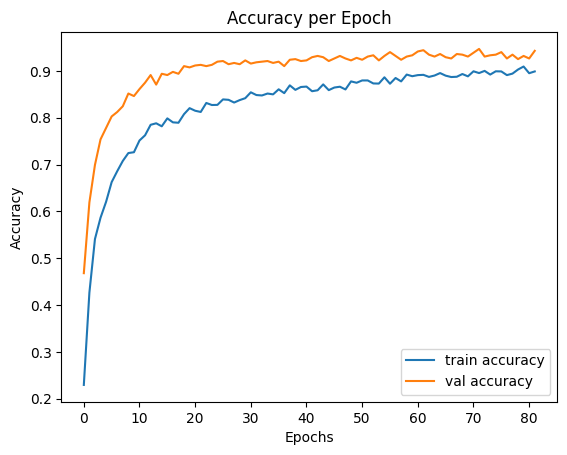

In [35]:
# --- Plot Akurasi dan Val Akurasi ---
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

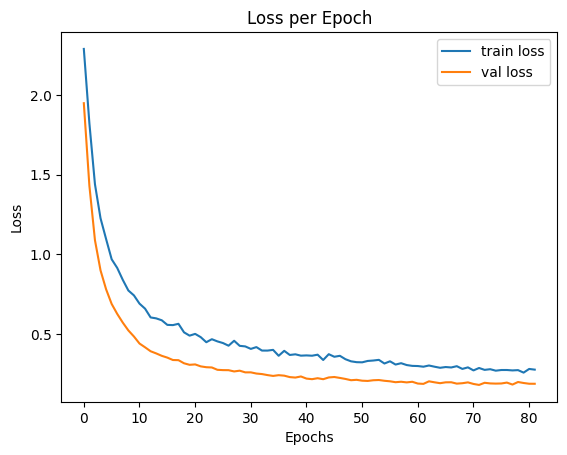

In [36]:
# --- Plot Loss dan Val Loss ---
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 449us/step


  1%|          | 1/100 [00:04<07:35,  4.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 445us/step


  2%|▏         | 2/100 [00:08<07:08,  4.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 441us/step


  3%|▎         | 3/100 [00:12<06:55,  4.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 436us/step


  4%|▍         | 4/100 [00:17<06:45,  4.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 440us/step


  5%|▌         | 5/100 [00:21<06:39,  4.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 440us/step


  6%|▌         | 6/100 [00:25<06:33,  4.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 442us/step


  7%|▋         | 7/100 [00:29<06:28,  4.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 435us/step


  8%|▊         | 8/100 [00:33<06:23,  4.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 437us/step


  9%|▉         | 9/100 [00:37<06:17,  4.15s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 439us/step


 10%|█         | 10/100 [00:42<06:18,  4.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 441us/step


 11%|█         | 11/100 [00:46<06:13,  4.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 441us/step


 12%|█▏        | 12/100 [00:50<06:08,  4.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 440us/step


 13%|█▎        | 13/100 [00:54<06:03,  4.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 440us/step


 14%|█▍        | 14/100 [00:58<06:00,  4.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 452us/step


 15%|█▌        | 15/100 [01:03<05:57,  4.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 442us/step


 16%|█▌        | 16/100 [01:07<05:52,  4.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 446us/step


 17%|█▋        | 17/100 [01:11<05:48,  4.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 444us/step


 18%|█▊        | 18/100 [01:15<05:43,  4.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 442us/step


 19%|█▉        | 19/100 [01:19<05:39,  4.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 443us/step


 20%|██        | 20/100 [01:24<05:34,  4.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 440us/step


 21%|██        | 21/100 [01:28<05:29,  4.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 441us/step


 22%|██▏       | 22/100 [01:32<05:25,  4.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 441us/step


 23%|██▎       | 23/100 [01:36<05:21,  4.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 441us/step


 24%|██▍       | 24/100 [01:40<05:20,  4.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 437us/step


 25%|██▌       | 25/100 [01:45<05:14,  4.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 438us/step


 26%|██▌       | 26/100 [01:49<05:09,  4.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 435us/step


 27%|██▋       | 27/100 [01:53<05:04,  4.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 439us/step


 28%|██▊       | 28/100 [01:57<04:59,  4.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 443us/step


 29%|██▉       | 29/100 [02:01<04:56,  4.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 437us/step


 30%|███       | 30/100 [02:05<04:51,  4.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 441us/step


 31%|███       | 31/100 [02:09<04:47,  4.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 437us/step


 32%|███▏      | 32/100 [02:14<04:42,  4.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 441us/step


 33%|███▎      | 33/100 [02:18<04:39,  4.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 446us/step


 34%|███▍      | 34/100 [02:22<04:35,  4.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 437us/step


 35%|███▌      | 35/100 [02:26<04:30,  4.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 440us/step


 36%|███▌      | 36/100 [02:30<04:26,  4.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 442us/step


 37%|███▋      | 37/100 [02:35<04:22,  4.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 473us/step


 38%|███▊      | 38/100 [02:39<04:22,  4.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 484us/step


 39%|███▉      | 39/100 [02:43<04:23,  4.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 503us/step


 40%|████      | 40/100 [02:48<04:25,  4.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 464us/step


 41%|████      | 41/100 [02:53<04:21,  4.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 468us/step


 42%|████▏     | 42/100 [02:57<04:17,  4.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 473us/step


 43%|████▎     | 43/100 [03:01<04:12,  4.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 457us/step


 44%|████▍     | 44/100 [03:06<04:06,  4.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 457us/step


 45%|████▌     | 45/100 [03:10<04:00,  4.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 448us/step


 46%|████▌     | 46/100 [03:14<03:53,  4.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 449us/step


 47%|████▋     | 47/100 [03:19<03:48,  4.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 488us/step


 48%|████▊     | 48/100 [03:23<03:46,  4.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 536us/step


 49%|████▉     | 49/100 [03:30<04:28,  5.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 6s 916us/step


 50%|█████     | 50/100 [03:38<05:02,  6.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 657us/step


 51%|█████     | 51/100 [03:44<04:58,  6.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 548us/step


 52%|█████▏    | 52/100 [03:50<04:40,  5.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 539us/step


 53%|█████▎    | 53/100 [03:55<04:23,  5.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 546us/step


 54%|█████▍    | 54/100 [04:00<04:14,  5.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 516us/step


 55%|█████▌    | 55/100 [04:05<04:00,  5.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 530us/step


 56%|█████▌    | 56/100 [04:10<03:49,  5.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 514us/step


 57%|█████▋    | 57/100 [04:15<03:37,  5.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 657us/step


 58%|█████▊    | 58/100 [04:20<03:42,  5.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 573us/step


 59%|█████▉    | 59/100 [04:26<03:37,  5.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 603us/step


 60%|██████    | 60/100 [04:31<03:33,  5.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 598us/step


 61%|██████    | 61/100 [04:37<03:29,  5.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 531us/step


 62%|██████▏   | 62/100 [04:42<03:19,  5.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 538us/step


 63%|██████▎   | 63/100 [04:47<03:10,  5.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 548us/step


 64%|██████▍   | 64/100 [04:52<03:04,  5.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 575us/step


 65%|██████▌   | 65/100 [04:57<03:01,  5.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 527us/step


 66%|██████▌   | 66/100 [05:02<02:54,  5.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 543us/step


 67%|██████▋   | 67/100 [05:07<02:47,  5.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 526us/step


 68%|██████▊   | 68/100 [05:12<02:42,  5.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 513us/step


 69%|██████▉   | 69/100 [05:17<02:34,  4.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 542us/step


 70%|███████   | 70/100 [05:22<02:29,  4.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 524us/step


 71%|███████   | 71/100 [05:26<02:22,  4.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 524us/step


 72%|███████▏  | 72/100 [05:31<02:16,  4.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 521us/step


 73%|███████▎  | 73/100 [05:36<02:11,  4.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 518us/step


 74%|███████▍  | 74/100 [05:41<02:06,  4.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 520us/step


 75%|███████▌  | 75/100 [05:46<02:01,  4.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 535us/step


 76%|███████▌  | 76/100 [05:51<01:56,  4.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 510us/step


 77%|███████▋  | 77/100 [05:55<01:50,  4.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 510us/step


 78%|███████▊  | 78/100 [06:00<01:45,  4.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 509us/step


 79%|███████▉  | 79/100 [06:05<01:39,  4.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 513us/step


 80%|████████  | 80/100 [06:09<01:34,  4.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 513us/step


 81%|████████  | 81/100 [06:14<01:29,  4.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 510us/step


 82%|████████▏ | 82/100 [06:19<01:25,  4.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 509us/step


 83%|████████▎ | 83/100 [06:24<01:20,  4.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 536us/step


 84%|████████▍ | 84/100 [06:28<01:16,  4.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 512us/step


 85%|████████▌ | 85/100 [06:33<01:11,  4.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 508us/step


 86%|████████▌ | 86/100 [06:38<01:06,  4.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 507us/step


 87%|████████▋ | 87/100 [06:42<01:01,  4.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 542us/step


 88%|████████▊ | 88/100 [06:47<00:57,  4.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 547us/step


 89%|████████▉ | 89/100 [06:52<00:53,  4.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 476us/step


 90%|█████████ | 90/100 [06:57<00:46,  4.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 445us/step


 91%|█████████ | 91/100 [07:01<00:40,  4.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 443us/step


 92%|█████████▏| 92/100 [07:05<00:35,  4.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 442us/step


 93%|█████████▎| 93/100 [07:09<00:30,  4.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 439us/step


 94%|█████████▍| 94/100 [07:13<00:25,  4.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 439us/step


 95%|█████████▌| 95/100 [07:18<00:21,  4.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 441us/step


 96%|█████████▌| 96/100 [07:22<00:16,  4.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 439us/step


 97%|█████████▋| 97/100 [07:26<00:12,  4.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 443us/step


 98%|█████████▊| 98/100 [07:30<00:08,  4.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 443us/step


 99%|█████████▉| 99/100 [07:34<00:04,  4.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 439us/step


100%|██████████| 100/100 [07:39<00:00,  4.59s/it]


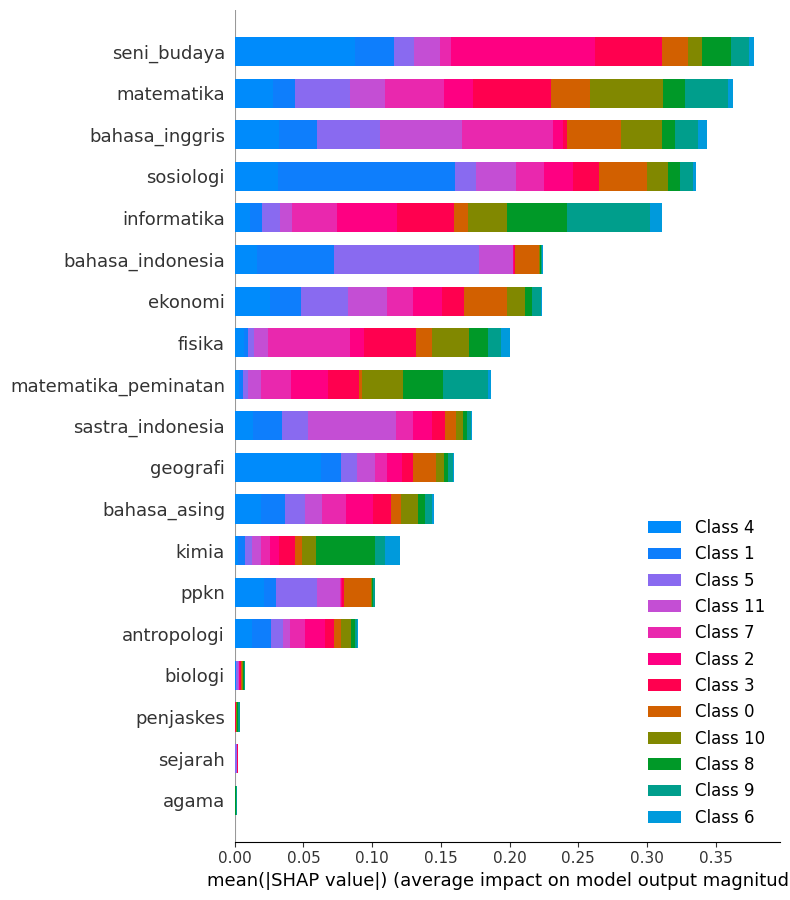

In [37]:
# Gunakan model tensorflow untuk interpretasi
explainer = shap.KernelExplainer(model.predict, X_train_scaled[:100])

# Hitung nilai SHAP untuk subset data
shap_values = explainer.shap_values(X_test_scaled[:100])
# Plot summary SHAP values
shap.summary_plot(shap_values, X_test_scaled[:100], feature_names=feature_cols, plot_type='bar')
# Gunakan LIME untuk interpretasi
explainer_lime = LimeTabularExplainer(
      training_data=X_train_scaled,
      feature_names=feature_cols,
      class_names=classes,
      mode='classification'
)

In [52]:
# Pilih satu contoh untuk interpretasi
idx = 267
exp = explainer_lime.explain_instance(
      data_row=X_test_scaled[idx],
      predict_fn=model.predict,
      num_features=5
)
# Visualisasikan hasil LIME
exp.show_in_notebook(show_table=True, show_all=False)


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step


In [39]:
# Save scaler
joblib.dump(num_pipe, 'Models/num_pipe.pkl')
print("Imputer and Scaler saved as 'num_pipe.pkl'")

# Save label encoder
joblib.dump(le, 'Models/label_encoder.pkl')
print("Label Encoder saved as 'label_encoder.pkl'")

# Simpan model Keras
model.save("Models/student_major_recommendation_model.keras")
print("Model Keras Sequential saved as 'student_major_recommendation_model.keras'")

Imputer and Scaler saved as 'num_pipe.pkl'
Label Encoder saved as 'label_encoder.pkl'
Model Keras Sequential saved as 'student_major_recommendation_model.keras'


## Tuning Model

### RandomizedSearchCV

In [40]:
#  Function untuk membangun model Keras
def build_model(
      optimizer="adam",
      activation="relu",
      dropout_rate=0.2,
      first_units=64,
      second_units=32,
      learning_rate=1e-3
      ):
      model = Sequential([
            # Input layer sesuai jumlah fitur
            Input(shape=(X_train_scaled.shape[1],)),
            Dense(first_units, activation=activation),
            Dropout(dropout_rate),
            Dense(second_units, activation=activation),
            Dropout(dropout_rate),
            Dense(len(classes), activation="softmax"),
      ])
      
      # pick optimizer
      optim = {
            "adam":    Adam(learning_rate=learning_rate),
            "rmsprop": RMSprop(learning_rate=learning_rate)
      }[optimizer]
      
      model.compile(
            optimizer=optim,
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"]
      )
      return model

# Bungkus model Keras
keras_clf = KerasClassifier(
      model       = build_model,
      validation_split = 0.15,
      epochs      = 100,
      batch_size  = 32,
      callbacks   = [EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)],
      verbose     = True,
)

# search parameters
param_dist = {
      "model__learning_rate": loguniform(1e-5, 1e-1),  
      "model__first_units":    randint(32, 256),
      "model__second_units":   randint(16, 128),
      "model__optimizer":      ["adam", "rmsprop"],
      "model__activation":     ["relu", "elu", "gelu", "tanh"],
      "model__dropout_rate":   [0.1, 0.2, 0.3, 0.4],
      "batch_size":            [16, 32, 64]
}

best_params_overall = None
best_score = 0

# RandomizedSearchCV
for stage in range(4):  # 4 × 50 = 200 iterasi total
      random_search = RandomizedSearchCV(
            estimator = keras_clf,
            param_distributions = param_dist,
            n_iter = 50,
            cv = 3,
            scoring = "accuracy",
            random_state = 42 + stage,
            return_train_score = True,  # Tambahkan ini untuk mendapatkan skor pelatihan
            verbose = True,  # Tambahkan verbosity untuk melihat progres
            n_jobs = -1,  # Gunakan semua core CPU
      )
      # Jalankan tuning
      random_search.fit(X_train_scaled, y_train)

      if random_search.best_score_ > best_score:
            best_score = random_search.best_score_
            best_params_overall = random_search.best_params_


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1788 - loss: 2.3890 - val_accuracy: 0.5476 - val_loss: 1.9923
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5107 - loss: 1.8919 - val_accuracy: 0.6408 - val_loss: 1.4971
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6176 - loss: 1.4336 - val_accuracy: 0.7087 - val_loss: 1.1263
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6666 - loss: 1.1223 - val_accuracy: 0.7437 - val_loss: 0.9067
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7307 - loss: 0.9073 - val_accuracy: 0.7728 - val_loss: 0.7720
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7359 - loss: 0.8424 - val_accuracy: 0.7883 - val_loss: 0.6886
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7469 - loss: 0.7587 - val_accuracy: 0.8078 - val_loss: 0.6235
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

c:\Data Central\Documents\Penulisan Ilmiah Zaky\Project\.venv\lib\site-packages\joblib\externals\loky\process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3984 - loss: 1.7805 - val_accuracy: 0.7049 - val_loss: 0.8094
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6620 - loss: 0.9387 - val_accuracy: 0.7379 - val_loss: 0.6544
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7001 - loss: 0.8450 - val_accuracy: 0.7534 - val_loss: 0.6007
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7130 - loss: 0.7771 - val_accuracy: 0.8097 - val_loss: 0.5261
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7279 - loss: 0.7206 - val_accuracy: 0.8311 - val_loss: 0.4672
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7584 - loss: 0.6405 - val_accuracy: 0.8680 - val_loss: 0.3832
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7917 - loss: 0.5756 - val_accuracy: 0.8680 - val_loss: 0.3654
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8006 - loss: 0.5371 - val_accuracy: 0.8738 - v

c:\Data Central\Documents\Penulisan Ilmiah Zaky\Project\.venv\lib\site-packages\joblib\externals\loky\process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2200 - loss: 2.2917 - val_accuracy: 0.6233 - val_loss: 1.4807
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6510 - loss: 1.2847 - val_accuracy: 0.7417 - val_loss: 0.9024
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7431 - loss: 0.8424 - val_accuracy: 0.7728 - val_loss: 0.6795
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7894 - loss: 0.6303 - val_accuracy: 0.8252 - val_loss: 0.5367
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8054 - loss: 0.5549 - val_accuracy: 0.8214 - val_loss: 0.4755
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8316 - loss: 0.4713 - val_accuracy: 0.8544 - val_loss: 0.3954
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8723 - loss: 0.3986 - val_accuracy: 0.8796 - val_loss: 0.3550
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8699 - loss: 0.3760 - val_accuracy: 0.8932 - v

c:\Data Central\Documents\Penulisan Ilmiah Zaky\Project\.venv\lib\site-packages\joblib\externals\loky\process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1916 - loss: 2.3791 - val_accuracy: 0.5476 - val_loss: 1.7939
Epoch 2/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4795 - loss: 1.7182 - val_accuracy: 0.6913 - val_loss: 1.1895
Epoch 3/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6187 - loss: 1.2507 - val_accuracy: 0.7515 - val_loss: 0.8944
Epoch 4/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6564 - loss: 1.0275 - val_accuracy: 0.7825 - val_loss: 0.7431
Epoch 5/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6961 - loss: 0.8893 - val_accuracy: 0.7981 - val_loss: 0.6410
Epoch 6/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7185 - loss: 0.8167 - val_accuracy: 0.8350 - val_loss: 0.5565
Epoch 7/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7556 - loss: 0.7210 - val_accuracy: 0.8524 - val_loss: 0.5025
Epoch 8/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7768 - loss: 0.6519 - val_accu

In [41]:
# Hasil tuning
print("Best parameters:", best_params_overall)
print("Best CV score:", best_score)

# Simpan model terbaik
best_model = random_search.best_estimator_.model_
best_model.save("Models/best_student_major_recommendation_model.keras")
print("Model Hasil Tuning disimpan sebagai 'best_student_major_recommendation_model.keras'")

Best parameters: {'batch_size': 16, 'model__activation': 'relu', 'model__dropout_rate': 0.3, 'model__first_units': 137, 'model__learning_rate': np.float64(0.00046102855529853897), 'model__optimizer': 'adam', 'model__second_units': 111}
Best CV score: 0.9157678134056088
Model Hasil Tuning disimpan sebagai 'best_student_major_recommendation_model.keras'


In [42]:
# Gunakan parameter terbaik untuk prediksi
best_keras_clf = random_search.best_estimator_
y_proba_keras = best_keras_clf.predict_proba(X_test_scaled)

# Ambil label prediksi
y_pred_idx = np.argmax(y_proba_keras, axis=1)

# Konversi y_test → index
y_true_idx  = y_test

# Hitung metrik
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_idx):.4f}")

print(classification_report(
      y_test,
      y_pred_idx,
      target_names=classes
))

cm = confusion_matrix(y_test, y_pred_idx, labels=range(len(classes)))

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step
Test Accuracy: 0.9334
              precision    recall  f1-score   support

          A1       0.91      0.88      0.89        33
         A10       0.93      0.96      0.95        85
         A11       0.92      0.95      0.94        76
         A12       0.93      0.98      0.95        81
         A13       0.89      0.93      0.91        71
          A2       0.97      0.94      0.96        72
          A3       0.71      0.62      0.67         8
          A4       0.94      0.99      0.96       108
          A5       0.95      0.82      0.88        44
          A6       0.95      0.83      0.89        42
          A7       0.95      0.95      0.95        58
          A9       0.96      0.91      0.94        58

    accuracy                           0.93       736
   macro avg       0.92      0.90      0.91       736
weighted avg       0.93      0.93      0.93       736



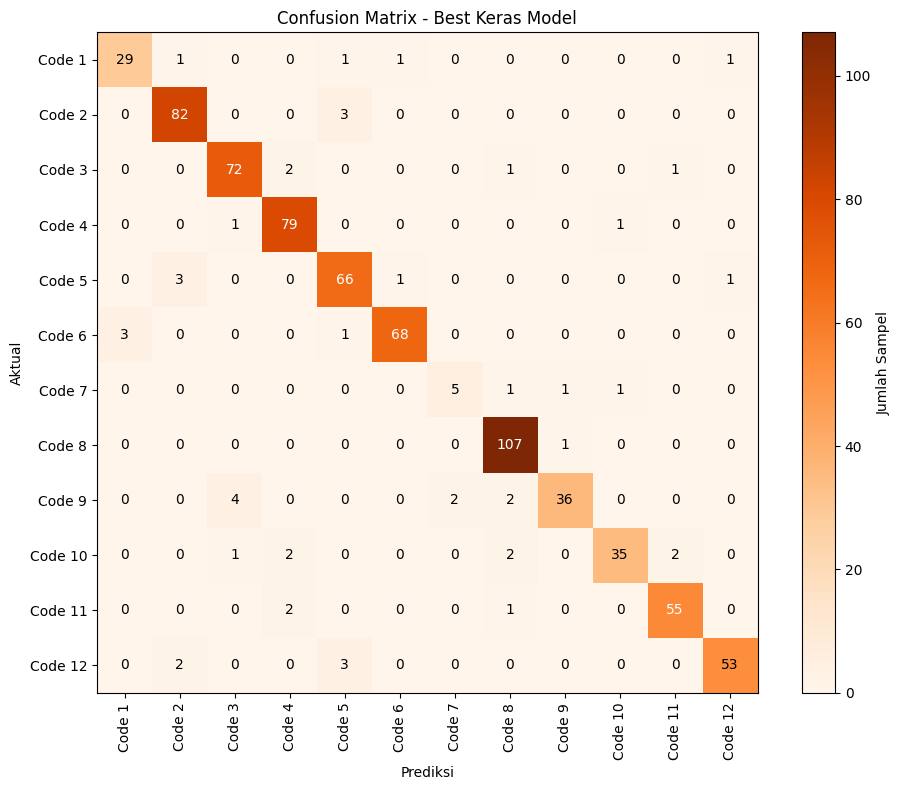

In [43]:
# Confussion Matrix - Best Keras Model
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(cm, cmap='Oranges')

# Tambahkan colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Jumlah Sampel')

# Set label ticks di kedua sumbu
classes = [f'Code {i+1}' for i in range(len(classes))]
ax.set_xticks(range(len(classes)))
ax.set_yticks(range(len(classes)))
ax.set_xticklabels(classes, rotation=90)
ax.set_yticklabels(classes)

# Label sumbu
ax.set_xlabel('Prediksi')
ax.set_ylabel('Aktual')
ax.set_title('Confusion Matrix - Best Keras Model')

# Annotasi angka di setiap cell
thresh = cm.max() / 2
for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
            color = 'white' if cm[i, j] > thresh else 'black'
            ax.text(j, i, format(cm[i, j], 'd'),
                  ha='center', va='center', color=color)
plt.tight_layout()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 475us/step


  1%|          | 1/100 [00:04<07:16,  4.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 490us/step


  2%|▏         | 2/100 [00:09<07:31,  4.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 483us/step


  3%|▎         | 3/100 [00:13<07:23,  4.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 510us/step


  4%|▍         | 4/100 [00:18<07:24,  4.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 518us/step


  5%|▌         | 5/100 [00:23<07:25,  4.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 495us/step


  6%|▌         | 6/100 [00:27<07:17,  4.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 491us/step


  7%|▋         | 7/100 [00:32<07:09,  4.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 476us/step


  8%|▊         | 8/100 [00:36<06:58,  4.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 469us/step


  9%|▉         | 9/100 [00:41<06:49,  4.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 466us/step


 10%|█         | 10/100 [00:45<06:40,  4.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 465us/step


 11%|█         | 11/100 [00:49<06:33,  4.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 466us/step


 12%|█▏        | 12/100 [00:54<06:27,  4.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 462us/step


 13%|█▎        | 13/100 [00:58<06:21,  4.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 464us/step


 14%|█▍        | 14/100 [01:02<06:15,  4.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 463us/step


 15%|█▌        | 15/100 [01:07<06:10,  4.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 463us/step


 16%|█▌        | 16/100 [01:11<06:05,  4.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 462us/step


 17%|█▋        | 17/100 [01:15<06:00,  4.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 487us/step


 18%|█▊        | 18/100 [01:20<05:59,  4.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 461us/step


 19%|█▉        | 19/100 [01:24<05:53,  4.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 458us/step


 20%|██        | 20/100 [01:28<05:47,  4.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 461us/step


 21%|██        | 21/100 [01:33<05:42,  4.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 460us/step


 22%|██▏       | 22/100 [01:37<05:37,  4.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 461us/step


 23%|██▎       | 23/100 [01:41<05:32,  4.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 459us/step


 24%|██▍       | 24/100 [01:46<05:28,  4.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 457us/step


 25%|██▌       | 25/100 [01:50<05:23,  4.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 463us/step


 26%|██▌       | 26/100 [01:54<05:19,  4.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 460us/step


 27%|██▋       | 27/100 [01:59<05:14,  4.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 458us/step


 28%|██▊       | 28/100 [02:03<05:10,  4.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 462us/step


 29%|██▉       | 29/100 [02:07<05:05,  4.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 462us/step


 30%|███       | 30/100 [02:12<05:02,  4.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 462us/step


 31%|███       | 31/100 [02:16<04:58,  4.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 463us/step


 32%|███▏      | 32/100 [02:20<04:54,  4.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 463us/step


 33%|███▎      | 33/100 [02:25<04:49,  4.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 462us/step


 34%|███▍      | 34/100 [02:29<04:45,  4.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 496us/step


 35%|███▌      | 35/100 [02:33<04:45,  4.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 464us/step


 36%|███▌      | 36/100 [02:38<04:39,  4.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 463us/step


 37%|███▋      | 37/100 [02:42<04:34,  4.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 463us/step


 38%|███▊      | 38/100 [02:46<04:29,  4.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 462us/step


 39%|███▉      | 39/100 [02:51<04:24,  4.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 465us/step


 40%|████      | 40/100 [02:55<04:21,  4.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 476us/step


 41%|████      | 41/100 [03:00<04:18,  4.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 456us/step


 42%|████▏     | 42/100 [03:04<04:12,  4.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 458us/step


 43%|████▎     | 43/100 [03:08<04:06,  4.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 461us/step


 44%|████▍     | 44/100 [03:12<04:02,  4.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 459us/step


 45%|████▌     | 45/100 [03:17<03:57,  4.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 459us/step


 46%|████▌     | 46/100 [03:21<03:52,  4.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 456us/step


 47%|████▋     | 47/100 [03:25<03:47,  4.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 459us/step


 48%|████▊     | 48/100 [03:30<03:43,  4.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 459us/step


 49%|████▉     | 49/100 [03:34<03:39,  4.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 460us/step


 50%|█████     | 50/100 [03:38<03:37,  4.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 459us/step


 51%|█████     | 51/100 [03:43<03:32,  4.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 457us/step


 52%|█████▏    | 52/100 [03:47<03:27,  4.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 464us/step


 53%|█████▎    | 53/100 [03:51<03:22,  4.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 465us/step


 54%|█████▍    | 54/100 [03:56<03:19,  4.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 465us/step


 55%|█████▌    | 55/100 [04:00<03:15,  4.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 467us/step


 56%|█████▌    | 56/100 [04:04<03:10,  4.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 464us/step


 57%|█████▋    | 57/100 [04:09<03:06,  4.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 467us/step


 58%|█████▊    | 58/100 [04:13<03:02,  4.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 462us/step


 59%|█████▉    | 59/100 [04:17<02:58,  4.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 469us/step


 60%|██████    | 60/100 [04:22<02:54,  4.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 475us/step


 61%|██████    | 61/100 [04:26<02:50,  4.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 463us/step


 62%|██████▏   | 62/100 [04:30<02:45,  4.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 3s 465us/step


 63%|██████▎   | 63/100 [04:35<02:44,  4.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 552us/step


 64%|██████▍   | 64/100 [04:40<02:46,  4.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 541us/step


 65%|██████▌   | 65/100 [04:45<02:44,  4.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 565us/step


 66%|██████▌   | 66/100 [04:50<02:43,  4.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 542us/step


 67%|██████▋   | 67/100 [04:55<02:39,  4.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 540us/step


 68%|██████▊   | 68/100 [05:00<02:35,  4.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 540us/step


 69%|██████▉   | 69/100 [05:05<02:30,  4.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 541us/step


 70%|███████   | 70/100 [05:10<02:26,  4.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 541us/step


 71%|███████   | 71/100 [05:15<02:21,  4.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 539us/step


 72%|███████▏  | 72/100 [05:19<02:16,  4.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 538us/step


 73%|███████▎  | 73/100 [05:24<02:11,  4.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 541us/step


 74%|███████▍  | 74/100 [05:29<02:07,  4.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 541us/step


 75%|███████▌  | 75/100 [05:34<02:02,  4.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 543us/step


 76%|███████▌  | 76/100 [05:39<01:57,  4.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 541us/step


 77%|███████▋  | 77/100 [05:44<01:52,  4.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 538us/step


 78%|███████▊  | 78/100 [05:49<01:47,  4.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 538us/step


 79%|███████▉  | 79/100 [05:54<01:42,  4.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 542us/step


 80%|████████  | 80/100 [05:59<01:37,  4.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 539us/step


 81%|████████  | 81/100 [06:03<01:32,  4.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 538us/step


 82%|████████▏ | 82/100 [06:08<01:27,  4.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 566us/step


 83%|████████▎ | 83/100 [06:13<01:23,  4.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 538us/step


 84%|████████▍ | 84/100 [06:18<01:18,  4.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 539us/step


 85%|████████▌ | 85/100 [06:23<01:13,  4.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 541us/step


 86%|████████▌ | 86/100 [06:28<01:08,  4.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 545us/step


 87%|████████▋ | 87/100 [06:33<01:03,  4.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 542us/step


 88%|████████▊ | 88/100 [06:38<00:58,  4.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 545us/step


 89%|████████▉ | 89/100 [06:43<00:54,  4.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 541us/step


 90%|█████████ | 90/100 [06:48<00:49,  4.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 540us/step


 91%|█████████ | 91/100 [06:53<00:44,  4.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 541us/step


 92%|█████████▏| 92/100 [06:57<00:39,  4.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 539us/step


 93%|█████████▎| 93/100 [07:02<00:34,  4.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 541us/step


 94%|█████████▍| 94/100 [07:07<00:29,  4.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 541us/step


 95%|█████████▌| 95/100 [07:12<00:24,  4.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 540us/step


 96%|█████████▌| 96/100 [07:17<00:19,  4.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 542us/step


 97%|█████████▋| 97/100 [07:22<00:14,  4.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 539us/step


 98%|█████████▊| 98/100 [07:27<00:09,  4.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 542us/step


 99%|█████████▉| 99/100 [07:32<00:04,  4.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 4s 544us/step


100%|██████████| 100/100 [07:37<00:00,  4.57s/it]


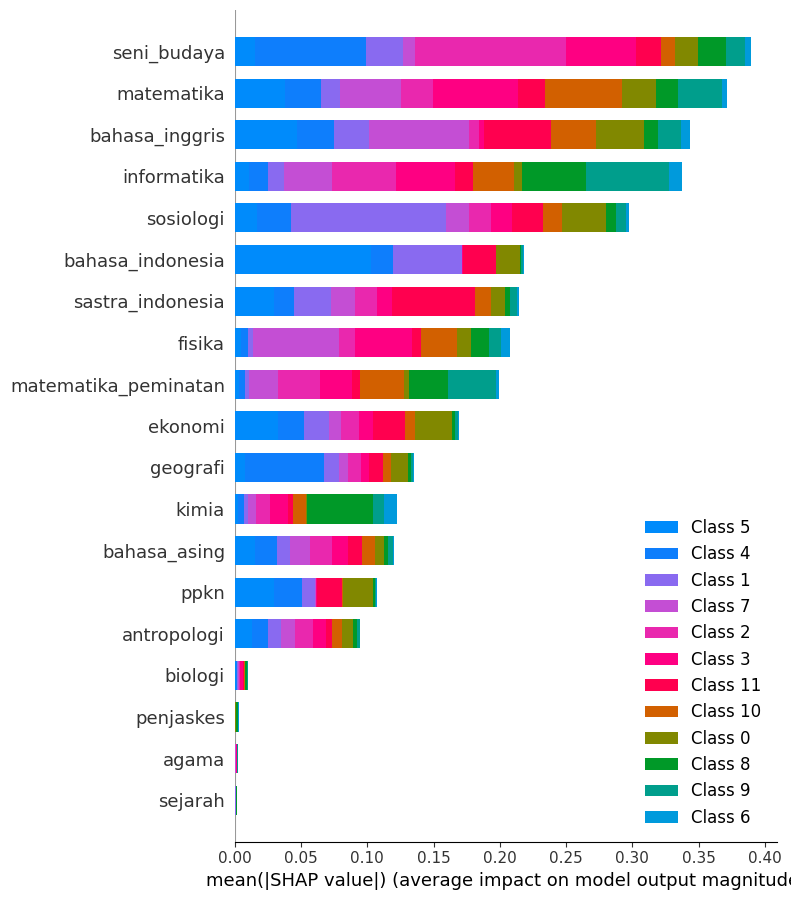

In [44]:
# Interpretasi best model SHAP
explainer_shap = shap.KernelExplainer(best_model.predict, X_train_scaled[:100])
# Hitung nilai SHAP untuk subset data
shap_values_best = explainer_shap.shap_values(X_test_scaled[:100])
# Plot summary SHAP values
shap.summary_plot(shap_values_best, X_test_scaled[:100], feature_names=feature_cols, plot_type='bar')

## Interpretasi Best Model

In [45]:
# Load model terbaik dan scaler
best_model = load_model('Models/best_student_major_recommendation_model.keras')
label_encoder = joblib.load('Models/label_encoder.pkl')  # encoder jurusan
scaler = joblib.load('Models/num_pipe.pkl')       # pastikan scaler disimpan saat training

In [55]:
# tampilkan informasi dari siswa yang diinterpretasi
student_info = X_test.iloc[idx]
print("Informasi Siswa yang Diinterpretasi:")
for col, val in student_info.items():
      print(f"{col}: {val}")

Informasi Siswa yang Diinterpretasi:
agama: 49.0
ppkn: 80.5
bahasa_indonesia: 98.0
matematika: 54.9
bahasa_inggris: 61.9
seni_budaya: 87.1
penjaskes: 40.0
sejarah: 70.4
fisika: nan
kimia: nan
biologi: nan
matematika_peminatan: nan
informatika: nan
ekonomi: 81.0
geografi: 61.5
sosiologi: 70.6
antropologi: 59.1
sastra_indonesia: 79.8
bahasa_asing: 93.2


In [57]:
# Interpretasi model Sequential awal dari satu siswa
classes = list(label_encoder.classes_)

explainer_lime = LimeTabularExplainer(
      training_data   = X_train_scaled,
      feature_names   = feature_cols,
      class_names     = classes,
      mode            = 'classification',
      discretize_continuous=False
)

exp = explainer_lime.explain_instance(
      data_row     = X_test_scaled[idx],
      predict_fn   = best_model.predict,
      num_features = 5
)

# Visualisasikan hasil LIME menggunakan plt
exp.show_in_notebook(show_table=True, show_all=False)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step


In [48]:
all_features   = core_subjects + ipa_subjects + ips_subjects

# Fungsi untuk prediksi jurusan dari input pengguna
def predict_major_from_input():
    print("=== Prediksi Rekomendasi Jurusan Universitas ===")
    track = input("Masukkan jurusan siswa (IPA / IPS): ").strip().upper()

    if track == 'IPA':
        track_bin = 1
        active_features = core_subjects + ipa_subjects
    elif track == 'IPS':
        track_bin = 0
        active_features = core_subjects + ips_subjects
    else:
        print("Track tidak valid. Gunakan 'IPA' atau 'IPS'.")
        return

    # Input nilai fitur
    input_data = {}
    for feat in all_features:
        if feat in active_features:
            try:
                val = float(input(f"Masukkan nilai {feat.replace('_', ' ').title()} (0-100): "))
            except:
                val = 0.0
        else:
            val = 0.0
        input_data[feat] = val

    # Tambahkan kolom track_bin
    input_data['track_bin'] = track_bin

    df_in = pd.DataFrame([input_data], columns=all_features)
    X_in = num_pipe.transform(df_in)
    proba = best_model.predict(X_in)[0]
    idx  = np.argmax(proba)
    code = le.inverse_transform([idx])[0]
    row  = df_major[df_major['code']==code]  

    # Tampilkan nilai input pada active_features
    print("\n>> Nilai Input:")
    for feat in active_features:
        print(f"{feat.replace('_', ' ').title()}: {input_data[feat]}")
    print(f"Track: {'IPA' if track_bin==1 else 'IPS'}")

    # 1) Filter berdasarkan passing grade
    print("\n>> Rekomendasi Lolos Passing Grade:")
    count = 0
    for idx in np.argsort(proba)[::-1]:
        code = le.inverse_transform([idx])[0]
        row = df_major[df_major['code'] == code].iloc[0]
        rel = [s.strip() for s in row['related_subjects'].split(';')]
        scores = [input_data.get(s, 0) for s in rel]
        if not scores:
            continue
        avg = np.mean(scores)
        pg = row.get('passing_grade', 0)
        if avg >= pg:
            print(f"{count+1}. {code} - {row['faculty']} / {row['major']} (avg={avg:.2f}, PG={pg:.2f})")
            count += 1
        if count >= 3:
            break

    # 2) Rule-Based Score
    scores = {}
    for _, mj in df_major.iterrows():
        if track in mj['track_type'] or 'IPA/IPS' in mj['track_type']:
            rel = [s.strip() for s in mj['related_subjects'].split(';')]
            scores[mj['code']] = compute_major_score(df_in.iloc[0], rel)
    top3 = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:3]
    
    print("\n>> Rekomendasi 3 Jurusan via Rule-Based Score:")
    for i, (code, sc) in enumerate(top3, 1):
        row = df_major[df_major['code'] == code].iloc[0]
        print(f"{i}. {code} - {row['faculty']} / {row['major']} (score={sc:.2f})")

    # 3) Probabilitas model
    print("\n>> Rekomendasi 3 Jurusan Teratas (berdasarkan probabilitas):")
    count = 0
    for idx in np.argsort(proba)[::-1]:
        if proba[idx] <= 0:
            continue
        code = le.inverse_transform([idx])[0]
        row = df_major[df_major['code'] == code].iloc[0]
        print(f"{count+1}. {code} - {row['faculty']} / {row['major']} (p={proba[idx]:.6f})")
        count += 1
        if count >= 3:
            break


In [56]:
# Jalankan fungsi untuk prediksi
predict_major_from_input()

=== Prediksi Rekomendasi Jurusan Universitas ===
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

>> Nilai Input:
Agama: 49.0
Ppkn: 80.5
Bahasa Indonesia: 98.0
Matematika: 54.9
Bahasa Inggris: 61.9
Seni Budaya: 87.1
Penjaskes: 40.0
Sejarah: 70.4
Ekonomi: 81.0
Geografi: 61.5
Sosiologi: 70.6
Antropologi: 59.1
Sastra Indonesia: 79.8
Bahasa Asing: 93.2
Track: IPS

>> Rekomendasi Lolos Passing Grade:
1. A13 - Fakultas Teknik Sipil dan Perencanaan / Desain Interior (avg=82.20, PG=81.20)

>> Rekomendasi 3 Jurusan via Rule-Based Score:
1. A13 - Fakultas Teknik Sipil dan Perencanaan / Desain Interior (score=82.20)
2. A9 - Fakultas Sastra / Sastra Inggris (score=79.90)
3. A1 - Fakultas Ekonomi / Manajemen (score=78.60)

>> Rekomendasi 3 Jurusan Teratas (berdasarkan probabilitas):
1. A11 - Fakultas Teknik Sipil dan Perencanaan / Arsitektur (p=1.000000)
2. A12 - Fakultas Teknik Sipil dan Perencanaan / Teknik Sipil (p=0.000000)
3. A6 - Fakultas Teknologi Industri / Teknik Elektro (p=0.000000)
